# W4- Logistic Regression

Logistic Regression is one of the classification methods that uses sigmoid hypothesis function. 

In the following sections we will first prepare the data for sklearn and then we will use LogisticRegression method available in sklearn to fit the parameters of the hypothesis function (Figure below).

![LogisticRegression](https://i.imgur.com/qLJkYLd.png)


1. [Import Python Packages and "Titanic.csv" file from data folder.](#t1.)


2. [Assess Data Quality & Missing Values](#t2.)
    * 2.1. [Age - Missing Values](#t2.1.)
    * 2.2. [Cabin - Missing Values](#t2.2.)
    * 2.3. [Embarked - Missing Values](#t2.3.)
    * 2.4. [Final Adjustments to Data](#t2.4.)
    
        
3. [Exploratory Data Analysis](#t3.)
    * 3.1. [Exploration of Age](#t3.1.)
    * 3.2. [Exploration of Fare](#t3.2.)
    * 3.3. [Exploration of Passenger Class](#t3.3.)
    * 3.4. [Exploration of Embarked Port](#t3.4.)
    * 3.5. [Exploration of Traveling Alone vs. With Family](#t3.5.)
    * 3.6. [Exploration of Gender Variable](#t3.6.)



4. [Logistic Regression and Results](#t4.)
    * 4.1. [Feature selection (Manual)](#t4.1.)
    * 4.2. [Feature selection with Recursive feature elimination (RFE)](#t4.2.)
    * 4.3. [Finding optimal number of features with RFECV](#t4.3.)
    

<a id="t1."></a>
## 1. Import Python Packages and "Titanic.csv" file from data folder.

In [171]:

import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 

import seaborn as sns


In [172]:
# Read CSV file into DataFrame
train_df = pd.read_table("data/Titanic.csv", sep=',')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
train_df.shape

(891, 12)

In [174]:
print('The number of samples into the train data: ', train_df.shape[0])

The number of samples into the train data:  891


<a id="t2."></a>
## 2. Data Quality & Missing Value Assessment

**Check missing values in train data**


In [175]:
train_df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<a id="t2.1."></a>
### 2.1.    Age - Missing Values

* Plot kernel density estimation and histogram of Age (distplot).
* What is the mean and median of Age?
* Which one is better to impute the missing values (mean or median)?

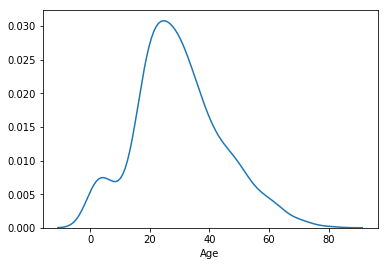

In [176]:

sns.distplot(train_df["Age"].dropna(), hist=False)


In [177]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [178]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

<a id="t2.2."></a>
### 2.2. Cabin - Missing Values

77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise.  We'll ignore this variable in our model.

In [179]:
train_data.drop('Cabin', axis=1, inplace=True)

<a id="t2.3."></a>
### 2.3. Embarked - Missing Values

There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

In [180]:
maxemb=train_df['Embarked'].value_counts()


In [181]:
train_data["Embarked"].fillna(maxemb, inplace=True)

#### Check missing values in adjusted train data.

In [182]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

**Plot density function of raw and adjusted "Age".**

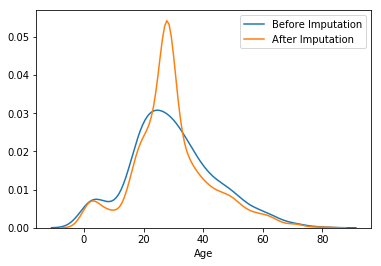

In [183]:
sns.distplot(train_df["Age"].dropna(), hist=False, label='Before Imputation')
sns.distplot(train_data["Age"], hist=False, label='After Imputation')

plt.legend()
plt.show()

<a id="t2.4."></a>
### 2.4. Final Adjustments

Note: 

**SibSp:** Number of Siblings/Spouses Aboard. </br>
**Parch** Number of Parents/Children Aboard.

1. Combine the effect of these variables into a categorical predictor that shows 1 for traveling alone and 0 if not (use **where** method of numpy).

1. Drop the old predictors. 

In [184]:
## Create categorical variable for traveling alone
train_data['Isalone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

**Create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked")**. 

1. Use get_dummies of Pandas.
1. Drop Ticket, Sex_female, PassengerId, Name.

In [185]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

training.drop(columns=['Name', 'Sex_female', 'PassengerId', 'Ticket'], inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,Isalone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


<a id="t3."></a>
## 3. Exploratory Data Analysis

<a id="t3.1."></a>
### 3.1. Exploration of Age

* Plot kernel density estimation of Age for both "Survived" and "Died"
* Which age range survived more?
* Create extra (binary) feature for this range.

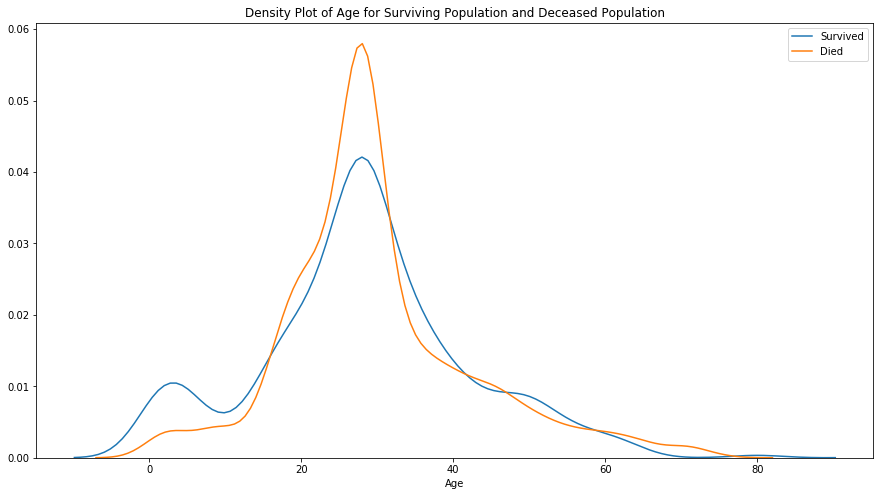

In [186]:
plt.figure(figsize=(15,8))

sns.distplot(final_train["Age"][final_train.Survived == 1], hist=False, label='Survived' )
sns.distplot(final_train["Age"][final_train.Survived == 0], hist=False, label='Died')

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.xlabel('Age')


plt.show()

In [187]:
# Add extra column for age under 16
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)


<a id="t3.2."></a>
### 3.2. Exploration of Fare

* Plot kernel density estimation of Fare for both "Survived" and "Died"
* Which Fare range survived more?


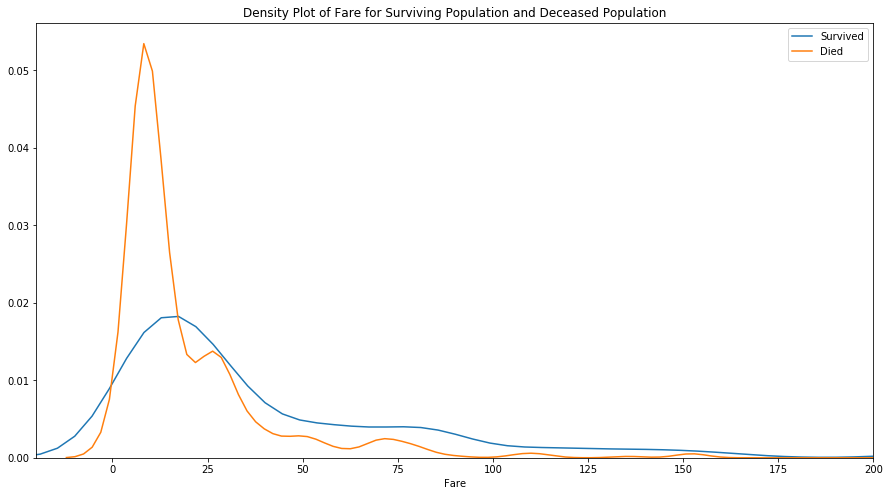

In [188]:
plt.figure(figsize=(15,8))

sns.distplot(final_train["Fare"][final_train.Survived == 1], hist=False, label='Survived')
sns.distplot(final_train["Fare"][final_train.Survived == 0], hist=False, label='Died')

plt.legend()
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.xlabel('Fare')
plt.xlim(-20,200)

plt.show()

<a id="t3.3."></a>
### 3.3. Exploration of Passenger Class

**How being in different class ('Pclass') effects survival rate?**

Use barplot of seaborn.

Statistically, the difference between which groups are significant?


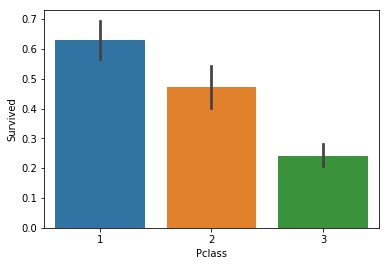

In [189]:
sns.barplot('Pclass', 'Survived', data=train_df)
plt.show()

<a id="t3.4."></a>
### 3.4. Exploration of Embarked Port

**How embarked port, effects the survival rate?**

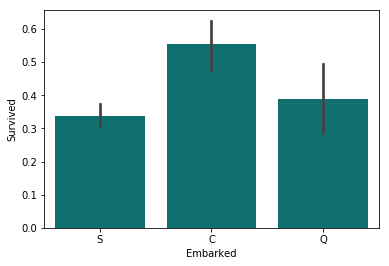

In [190]:
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate.  Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown.  This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck). <br> It's also worth noting the size of the whiskers in these plots.  Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest.  The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker.  It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

<a id="t3.5."></a>
### 3.5. Exploration of Traveling Alone vs. With Family

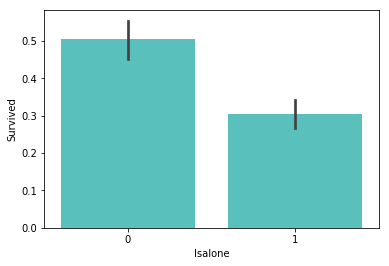

In [191]:
sns.barplot('Isalone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

<a id="t3.6."></a>
### 3.6. Exploration of Gender Variable

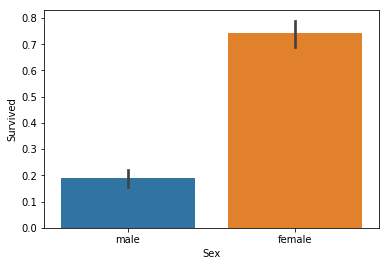

In [192]:
sns.barplot('Sex', 'Survived', data=train_df)
plt.show()

This is a very obvious difference.  Clearly being female greatly increased your chances of survival.

<a id="t4."></a>
# 4. Logistic Regression and Results

<a id="t4.1."></a>
### 4.1. Feature selection (manual)

**Steps:**

1. Split the selected features so far as X and target as y.
1. Use train_test_split available in model_selection and create X_train, y_train, ...
1. Use LogisticRegression available in linear_model to fit X_train to y_train.
1. Print the coef_ of trained model and specify the least important feature. 
1. Eliminate this feature and train another model to see the next least important feature. 
1. Continue this process until you rank the importance of all features

In [199]:
cols = ["Age","Fare","Isalone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols].values
y = final_train['Survived'].values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


clf=LogisticRegression(solver='liblinear')
clf.fit(X_train,y_train)
clf.coef_



array([[-2.40634352e-02,  1.81392923e-03,  7.14295004e-02,
         1.99192294e+00,  1.24922688e+00,  7.67912358e-02,
        -3.99437864e-01, -2.50332855e+00,  5.90791377e-01]])

<a id="t4.2."></a>
### 4.2. Feature selection with recursive feature elimination [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

Recursive feature elimination (RFE) selects features by recursively eliminating least important features.

**Algorithm:**

1. Train the estimator (any clf or rgr) on the initial set of features.
1. Obtain the importance of each feature through a `coef_ attribute` or through a `feature_importances_` attribute.
1. Prune the least important feature and train the estimator on the remaining set of features.
1. Go to step 1 (until you have desired number of features)



#### Using RFE, select top 8 features for training. 

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","Isalone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
clf = LogisticRegression(solver='liblinear')
# create the RFE model and select 8 attributes
clf_rfe = RFE(clf, 1)
clf_rfe = clf_rfe.fit(X, y) # choose X with important features (based on ranking_)


In [195]:
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[clf_rfe.support_]))

print('Ranking of features: ', clf_rfe.ranking_)

Selected features: ['Sex_male']
Ranking of features:  [8 9 7 2 3 6 5 1 4]


<a id="t4.3."></a>
### 4.3. Finding optimal number of features with RFECV.

**Steps:**

1. From sklearn.feature_selection import RFECV.
1. Use LogisticRegression as estimator (clf).
1. Create RFECV model with clf and cv=5.
1. Use created model to fit X and y (why not X_train and y_train?).
1. Print the optimal ranking of features using **.ranking_** attribute.

In [201]:
%%time
from sklearn.feature_selection import RFECV

clf=LogisticRegression(solver='liblinear')

clf_rfecv=RFECV(clf, cv=5, verbose=1)

clf_rfecv.fit(X,y)

print(clf_rfecv.ranking_)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator wi